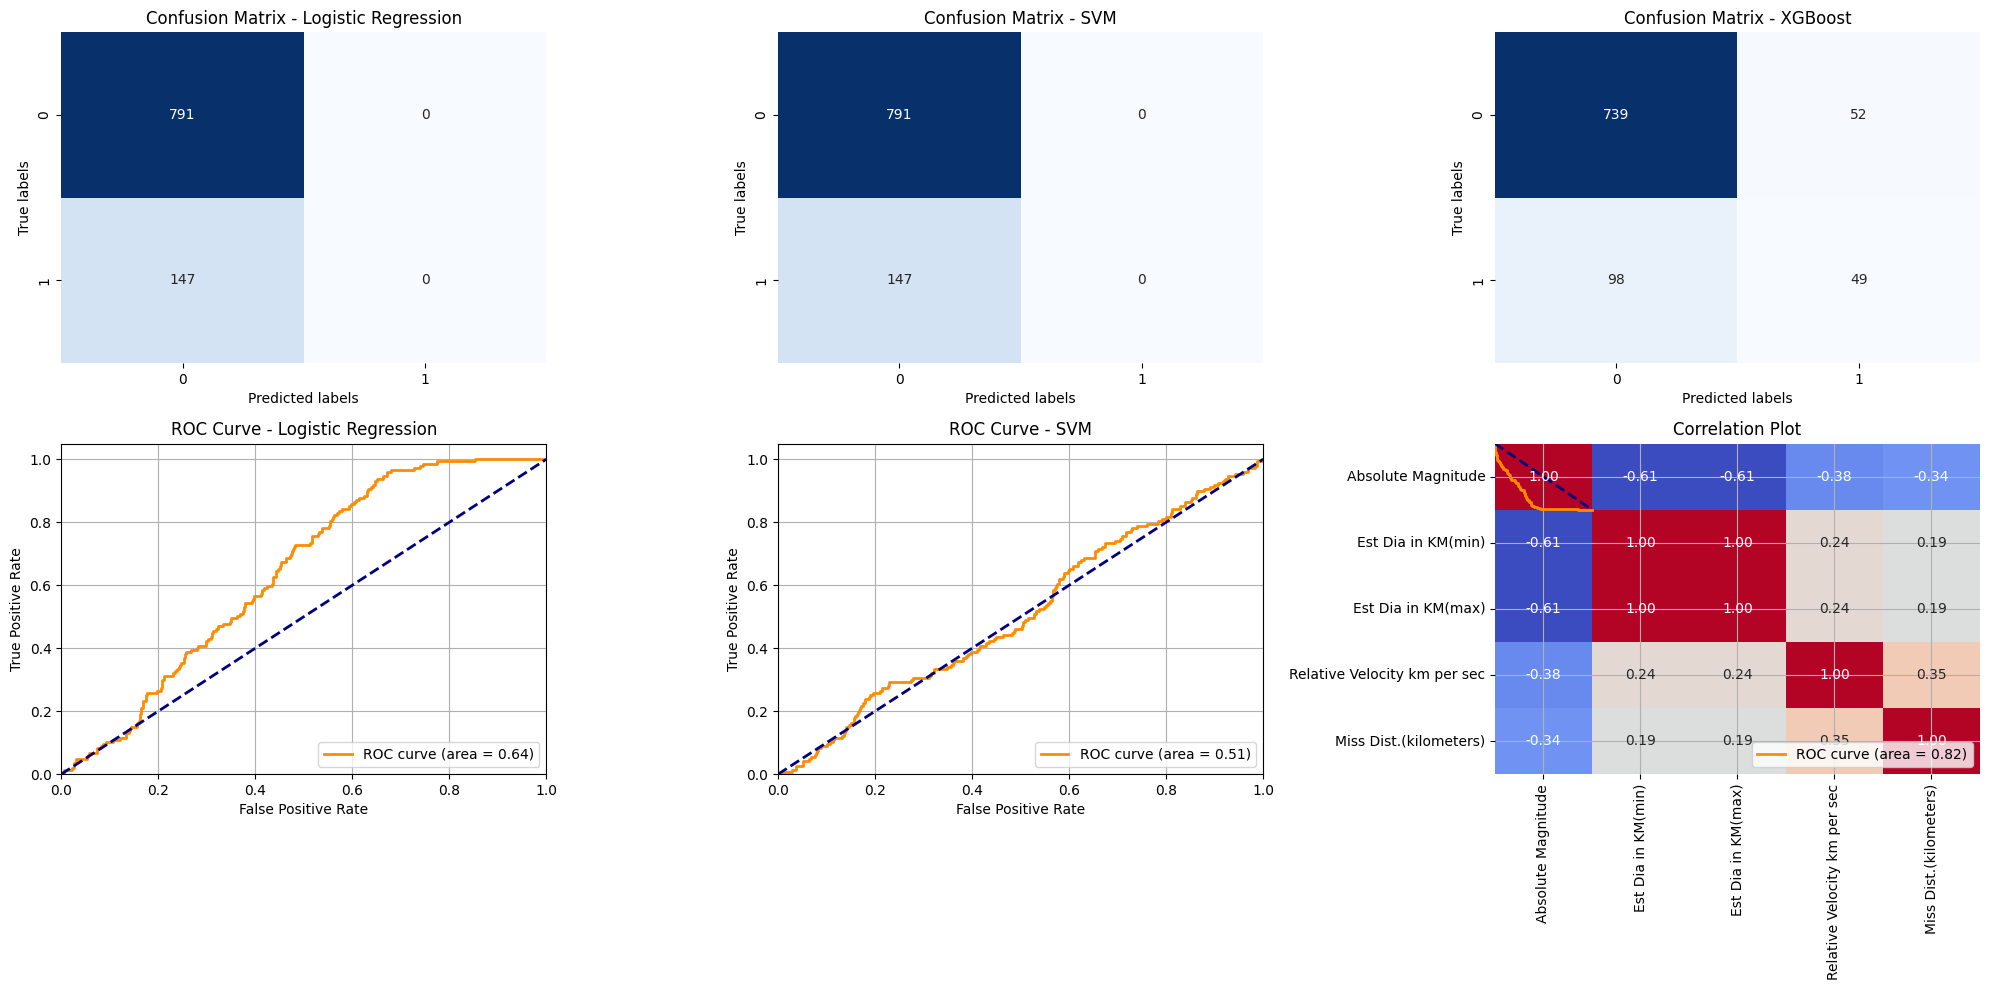

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, roc_curve, auc
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv(r"C:\Users\Downloads\asteroid\nasa.csv")

# Select features and target variable
X = df[['Absolute Magnitude', 'Est Dia in KM(min)', 'Est Dia in KM(max)', 'Relative Velocity km per sec', 'Miss Dist.(kilometers)']]
y = df['Hazardous']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the classifiers
log_reg_classifier = LogisticRegression()
log_reg_classifier.fit(X_train, y_train)

svm_classifier = SVC(probability=True)
svm_classifier.fit(X_train, y_train)

xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train, y_train)

classifiers = [
    ("Logistic Regression", log_reg_classifier),
    ("SVM", svm_classifier),
    ("XGBoost", xgb_classifier)
]

# Plot confusion matrix, ROC curve, and correlation plot for each classifier
plt.figure(figsize=(20, 10))

for i, (name, classifier) in enumerate(classifiers, 1):
    plt.subplot(2, 3, i)

    # Generate confusion matrix
    y_pred = classifier.predict(X_test)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Plot confusion matrix
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix - {name}')
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    # Plot ROC Curve
    plt.subplot(2, 3, i+3)
    y_score = classifier.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {name}')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

# Plot correlation matrix
plt.subplot(2, 3, 6)
corr = df[['Absolute Magnitude', 'Est Dia in KM(min)', 'Est Dia in KM(max)', 'Relative Velocity km per sec', 'Miss Dist.(kilometers)']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', cbar=False, fmt=".2f")
plt.title('Correlation Plot')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()
